#  Sports Performance Analysis using KNN neighbors

## import the needed libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

## read the dataset

In [9]:
data=pd.read_csv("player_stats.csv")

In [11]:
data.head()

,Accuracy,Speed,Stamina,Age
0,68.727006,27.290072,96.330635,31
1,97.535715,27.712703,69.582476,23
2,86.599697,20.740447,65.795795,23
3,79.932924,23.584657,79.578110,30
4,57.800932,21.158691,99.426018,36


## missing values

In [12]:
print("\n Missing values in dataset")
print(data.isnull().sum())


 Missing values in dataset
Accuracy    0
Speed       0
Stamina     0
Age         0
dtype: int64


#####  Above concluded that there is no null or missing values in the dataset

In [13]:
# drop missing values
data.dropna(inplace=True)

## z- score method

In [24]:
from scipy.stats import zscore

In [25]:
z_score=np.abs(zscore(data[['Accuracy','Speed','Stamina','Age']]))

In [27]:
outliers=(z_score >3).all(axis=1)

In [28]:
data['outlier']=outliers

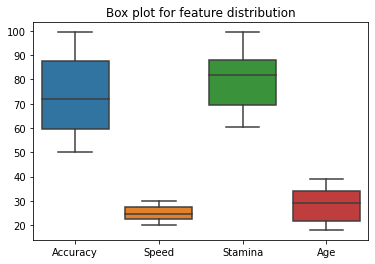

In [29]:
sns.boxplot(data=data[['Accuracy','Speed','Stamina','Age']])
plt.title("Box plot for feature distribution")
plt.show()

In [30]:
# split the features

In [31]:
x=data[['Accuracy','Speed','Stamina','Age']]
y=data['outlier']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
#scale features
scaler=StandardScaler()
x_train_scal=scaler.fit_transform(x_train)
x_test_scal=scaler.fit_transform(x_test)


### Build knn models

In [34]:
knn_outlier=KNeighborsClassifier(n_neighbors=3)
knn_outlier.fit(x_train_scal,y_train)

KNeighborsClassifier(n_neighbors=3)

## make prediction

In [35]:
y_pred_no_outlier=knn_outlier.predict(x_test_scal)

In [36]:
#accuracy and confusion matrix

In [37]:
accuracy_no_out=accuracy_score(y_test,y_pred_no_outlier)
cm_out=confusion_matrix(y_test,y_pred_no_outlier)

###  KNN model with outliers

In [38]:
x_train_out=x_train_scal
x_test_out=x_test_scal
knn_with_out=KNeighborsClassifier(n_neighbors=3)
knn_with_out.fit(x_train_out,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# make prediction with outlier
y_pred_with_out=knn_with_out.predict(x_test_out)

In [40]:
#accuracu and confusion matrix
accuracy_with_out=accuracy_score(y_test, y_pred_with_out)
cm_with_out=confusion_matrix(y_test,y_pred_with_out)


In [41]:
# compare result
print("\n accuracy without outliers:",accuracy_no_out)
print("\n accuracy with outliers:",accuracy_with_out)


 accuracy without outliers: 1.0

 accuracy with outliers: 1.0


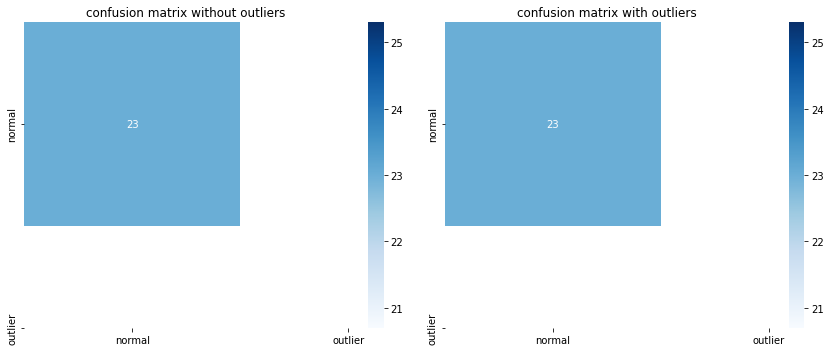

In [45]:
#plot confusion matrix

fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.heatmap(cm_out,annot=True,fmt='d',cmap='Blues',xticklabels=['normal','outlier'],yticklabels=['normal','outlier'],ax=ax[0])
ax[0].set_title("confusion matrix without outliers")
sns.heatmap(cm_with_out,annot=True,fmt='d',cmap='Blues',xticklabels=['normal','outlier'],yticklabels=['normal','outlier'],ax=ax[1])
ax[1].set_title("confusion matrix with outliers")
plt.tight_layout()
plt.show()